In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Laptop_Price.csv")
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [5]:
df.shape

(823, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [9]:
df.duplicated().sum()

21

In [11]:
df.drop_duplicates(inplace = True)

In [13]:
df['ram_gb'].str.replace("GB", '')

0      4 
1      4 
2      4 
3      8 
4      4 
       ..
818    4 
819    4 
820    4 
821    4 
822    8 
Name: ram_gb, Length: 802, dtype: object

In [15]:
df['ram_gb'] = df['ram_gb'].str.replace("GB", '')

In [17]:
df['ram_gb'] = df['ram_gb'].astype('int32')

In [19]:
df['graphic_card_gb'] = df['graphic_card_gb'].str.replace('GB', '')
df['os_bit'] = df['os_bit'].str.replace('-bit', '')
df['ssd'] = df['ssd'].str.replace("GB", '')
df['hdd'] = df['hdd'].str.replace("GB", '')
df['rating'] = df['rating'].str.replace('stars', '')

In [21]:
df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,No,No,34649,2,3,0
1,Lenovo,Intel,Core i3,10th,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,No,No,38999,3,65,5
2,Lenovo,Intel,Core i3,10th,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,No,No,39999,3,8,1
3,ASUS,Intel,Core i5,10th,8,DDR4,512,0,Windows,32,2,Casual,No warranty,No,No,69990,3,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4,DDR4,0,512,Windows,64,0,Casual,No warranty,No,No,26990,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4,DDR4,1024,0,Windows,64,0,Casual,1 year,No,No,135990,3,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4,DDR4,1024,0,Windows,64,0,Casual,1 year,No,No,144990,3,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4,DDR4,1024,0,Windows,64,4,Casual,1 year,No,No,149990,3,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4,DDR4,1024,0,Windows,64,4,Casual,1 year,No,No,142990,3,0,0


In [23]:
df['rating'].value_counts()

rating
4         437
3         338
5          16
2           9
1 star      2
Name: count, dtype: int64

In [25]:
df['rating'] = df['rating'].str.replace('1 star', '1')

In [27]:
df['graphic_card_gb'] = df['graphic_card_gb'].astype('int32')
df['os_bit'] = df['os_bit'].astype('int32')
df['ssd'] = df['ssd'].astype('int32')
df['hdd'] = df['hdd'].astype('int32')
df['rating'] = df['rating'].astype('int32')
df['Number of Ratings'] = df['Number of Ratings'].astype('int32')
df['Number of Reviews'] = df['Number of Reviews'].astype('int32')

In [29]:
print(df['warranty'].value_counts())
print()
print(df['Touchscreen'].value_counts())
print()
print(df['msoffice'].value_counts())

warranty
1 year         498
No warranty    268
2 years         23
3 years         13
Name: count, dtype: int64

Touchscreen
No     706
Yes     96
Name: count, dtype: int64

msoffice
No     522
Yes    280
Name: count, dtype: int64


In [31]:
df['warranty'] = df['warranty'].map({'1 year' : 1, 'No warranty' : 0, '2 years' : 2, '3 years' : 3})
df['Touchscreen'] = df['Touchscreen'].map({"Yes" : 1, 'No' : 0})
df['msoffice'] = df['msoffice'].map({'Yes' : 1, 'No' : 0})

In [33]:
df['ram_type'].value_counts()

ram_type
DDR4       690
LPDDR4X     56
LPDDR4      27
LPDDR3      14
DDR5         8
DDR3         7
Name: count, dtype: int64

In [35]:
df['ram_type'] = df['ram_type'].map({'DDR3' : 0, 'LPDDR3' : 1, 'DDR4' : 2, 'LPDDR4' : 3, 'LPDDR4X' : 4, 'DDR5' : 5})

In [37]:
df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4,2,0,1024,Windows,64,0,Casual,0,0,0,34649,2,3,0
1,Lenovo,Intel,Core i3,10th,4,2,0,1024,Windows,64,0,Casual,0,0,0,38999,3,65,5
2,Lenovo,Intel,Core i3,10th,4,2,0,1024,Windows,64,0,Casual,0,0,0,39999,3,8,1
3,ASUS,Intel,Core i5,10th,8,2,512,0,Windows,32,2,Casual,0,0,0,69990,3,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4,2,0,512,Windows,64,0,Casual,0,0,0,26990,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4,2,1024,0,Windows,64,0,Casual,1,0,0,135990,3,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4,2,1024,0,Windows,64,0,Casual,1,0,0,144990,3,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4,2,1024,0,Windows,64,4,Casual,1,0,0,149990,3,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4,2,1024,0,Windows,64,4,Casual,1,0,0,142990,3,0,0


In [39]:
df['warranty'] = df['warranty'].astype('int32')
df['Touchscreen'] = df['Touchscreen'].astype('int32')
df['msoffice'] = df['msoffice'].astype('int32')
df['ram_type'] = df['ram_type'].astype('int32')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 802 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              802 non-null    object
 1   processor_brand    802 non-null    object
 2   processor_name     802 non-null    object
 3   processor_gnrtn    802 non-null    object
 4   ram_gb             802 non-null    int32 
 5   ram_type           802 non-null    int32 
 6   ssd                802 non-null    int32 
 7   hdd                802 non-null    int32 
 8   os                 802 non-null    object
 9   os_bit             802 non-null    int32 
 10  graphic_card_gb    802 non-null    int32 
 11  weight             802 non-null    object
 12  warranty           802 non-null    int32 
 13  Touchscreen        802 non-null    int32 
 14  msoffice           802 non-null    int32 
 15  Price              802 non-null    int64 
 16  rating             802 non-null    int32 
 17  Nu

### EDA

C:\Users\Zohaib Ali Singay\AppData\Local\Temp\ipykernel_2812\665222154.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df['Price'])


<Axes: ylabel='Density'>

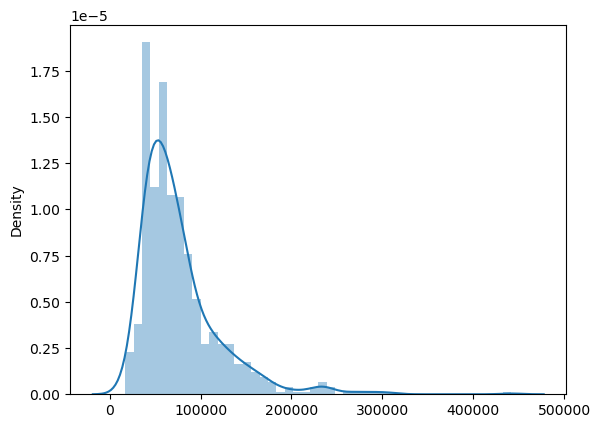

In [45]:
sns.distplot(x = df['Price'])

In [46]:
## There are very few laptops whose price is high. Therefore the data is skewed and there can be problems for some ML algorithms to converge correctly
# due to this skewness.

<Axes: xlabel='brand'>

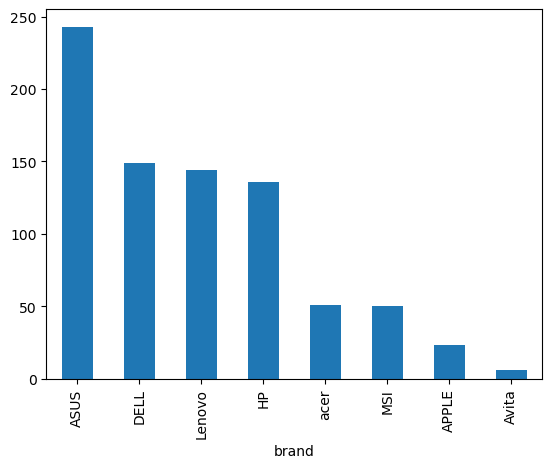

In [49]:
df['brand'].value_counts().plot(kind = 'bar')

In [51]:
df[df['brand'] == "ASUS"]['Touchscreen'].value_counts()

Touchscreen
0    214
1     29
Name: count, dtype: int64

<Axes: xlabel='Price', ylabel='Density'>

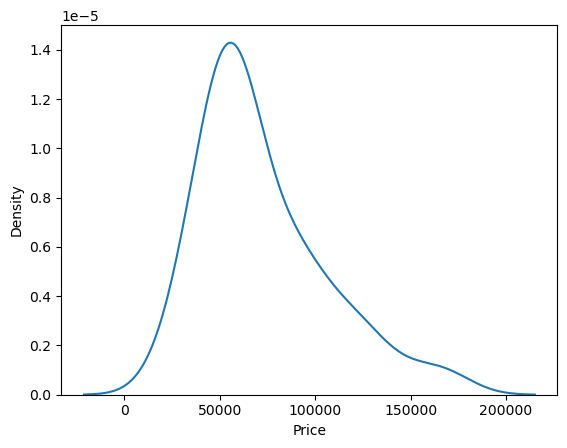

In [53]:
sns.kdeplot(x = df[df['brand'] == "acer"]['Price'])

<Axes: xlabel='brand'>

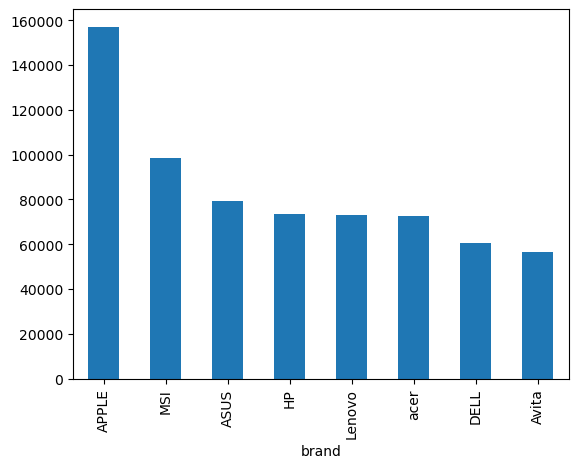

In [55]:
df.groupby('brand')['Price'].mean().sort_values(ascending = False).plot(kind = 'bar')

<Axes: xlabel='brand', ylabel='Price'>

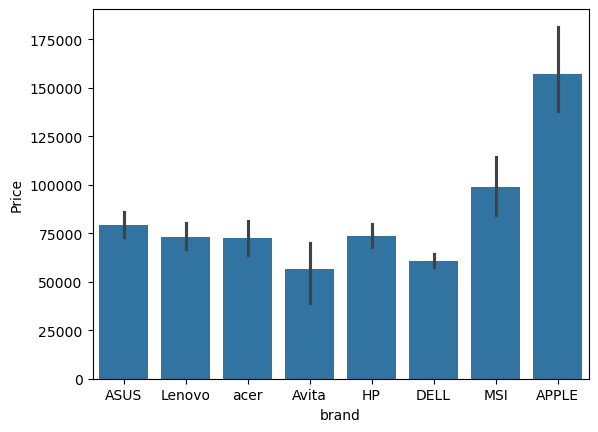

In [57]:
sns.barplot(x = df['brand'], y = df['Price'])

<Axes: xlabel='processor_name'>

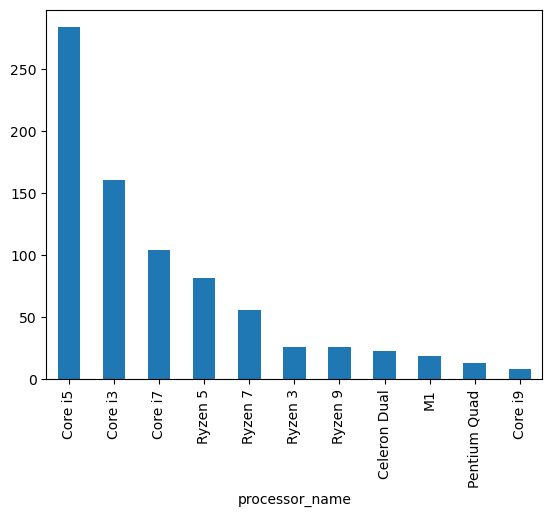

In [58]:
df['processor_name'].value_counts().plot(kind = 'bar')

In [61]:
df['processor_name'].value_counts()

processor_name
Core i5         284
Core i3         161
Core i7         104
Ryzen 5          82
Ryzen 7          56
Ryzen 3          26
Ryzen 9          26
Celeron Dual     23
M1               19
Pentium Quad     13
Core i9           8
Name: count, dtype: int64

In [63]:
df['processor_gnrtn'].value_counts()

processor_gnrtn
11th             328
Not Available    224
10th             198
8th               35
7th                7
9th                6
12th               3
4th                1
Name: count, dtype: int64

In [65]:
df['processor_gnrtn'] = df['processor_gnrtn'].replace('Not Available', '-1')
df['processor_gnrtn'].value_counts()

processor_gnrtn
11th    328
-1      224
10th    198
8th      35
7th       7
9th       6
12th      3
4th       1
Name: count, dtype: int64

In [67]:
df['prcessor_gnrtn_na'] = pd.to_numeric(df['processor_gnrtn'], errors = 'coerce')
df['prcessor_gnrtn_na'].value_counts()

prcessor_gnrtn_na
-1.0    224
Name: count, dtype: int64

In [69]:
df['processor_gnrtn'] = df['processor_gnrtn'].replace('-1', 'Not Available')

In [71]:
df['processor_gnrtn'].value_counts()

processor_gnrtn
11th             328
Not Available    224
10th             198
8th               35
7th                7
9th                6
12th               3
4th                1
Name: count, dtype: int64

In [73]:
df['prcessor_gnrtn_na'].fillna(0, inplace = True)

C:\Users\Zohaib Ali Singay\AppData\Local\Temp\ipykernel_2812\4080859404.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['prcessor_gnrtn_na'].fillna(0, inplace = True)


In [75]:
df['prcessor_gnrtn_na'].value_counts()

prcessor_gnrtn_na
 0.0    578
-1.0    224
Name: count, dtype: int64

In [77]:
df['processor_name'].value_counts()

processor_name
Core i5         284
Core i3         161
Core i7         104
Ryzen 5          82
Ryzen 7          56
Ryzen 3          26
Ryzen 9          26
Celeron Dual     23
M1               19
Pentium Quad     13
Core i9           8
Name: count, dtype: int64

In [79]:
(df['processor_brand']+ " " + df['processor_name']).value_counts()

Intel Core i5         284
Intel Core i3         161
Intel Core i7         104
AMD Ryzen 5            82
AMD Ryzen 7            55
AMD Ryzen 3            26
AMD Ryzen 9            26
Intel Celeron Dual     23
M1 M1                  19
Intel Pentium Quad     13
Intel Core i9           8
Intel Ryzen 7           1
Name: count, dtype: int64

In [81]:
(df['processor_brand']+ " " + df['processor_name']).replace('M1 M1', 'M1').value_counts()

Intel Core i5         284
Intel Core i3         161
Intel Core i7         104
AMD Ryzen 5            82
AMD Ryzen 7            55
AMD Ryzen 3            26
AMD Ryzen 9            26
Intel Celeron Dual     23
M1                     19
Intel Pentium Quad     13
Intel Core i9           8
Intel Ryzen 7           1
Name: count, dtype: int64

In [83]:
df['processor'] = (df['processor_brand']+ " " + df['processor_name']).replace('M1 M1', 'M1')

In [85]:
df.drop(columns = ['processor_brand', 'processor_name'], inplace = True)

In [87]:
df.corr(numeric_only = True)['Price']

ram_gb               0.516454
ram_type             0.174159
ssd                  0.628734
hdd                 -0.251266
os_bit              -0.019731
graphic_card_gb      0.467499
warranty             0.057953
Touchscreen          0.191227
msoffice            -0.103783
Price                1.000000
rating              -0.040564
Number of Ratings   -0.152553
Number of Reviews   -0.156791
prcessor_gnrtn_na    0.102512
Name: Price, dtype: float64

<Axes: xlabel='ram_type'>

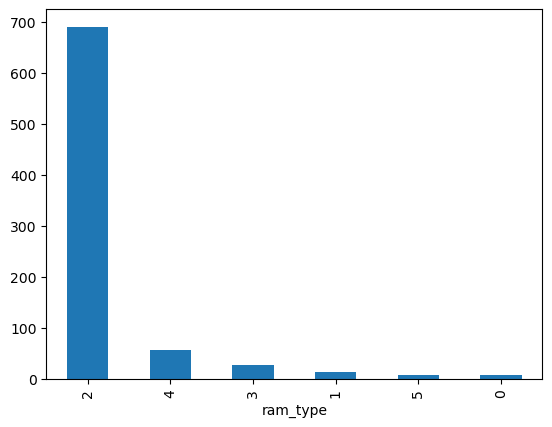

In [89]:
df['ram_type'].value_counts().plot(kind = 'bar')

In [91]:
df

,brand,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews,prcessor_gnrtn_na,processor
0,ASUS,10th,4,2,0,1024,Windows,64,0,Casual,0,0,0,34649,2,3,0,0.0,Intel Core i3
1,Lenovo,10th,4,2,0,1024,Windows,64,0,Casual,0,0,0,38999,3,65,5,0.0,Intel Core i3
2,Lenovo,10th,4,2,0,1024,Windows,64,0,Casual,0,0,0,39999,3,8,1,0.0,Intel Core i3
3,ASUS,10th,8,2,512,0,Windows,32,2,Casual,0,0,0,69990,3,0,0,0.0,Intel Core i5
4,ASUS,Not Available,4,2,0,512,Windows,64,0,Casual,0,0,0,26990,3,0,0,-1.0,Intel Celeron Dual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,Not Available,4,2,1024,0,Windows,64,0,Casual,1,0,0,135990,3,0,0,-1.0,AMD Ryzen 9
819,ASUS,Not Available,4,2,1024,0,Windows,64,0,Casual,1,0,0,144990,3,0,0,-1.0,AMD Ryzen 9
820,ASUS,Not Available,4,2,1024,0,Windows,64,4,Casual,1,0,0,149990,3,0,0,-1.0,AMD Ryzen 9
821,ASUS,Not Available,4,2,1024,0,Windows,64,4,Casual,1,0,0,142990,3,0,0,-1.0,AMD Ryzen 9


In [93]:
df['os'].value_counts()

os
Windows    763
Mac         23
DOS         16
Name: count, dtype: int64

In [95]:
df['prcessor_gnrtn_na'] = df['prcessor_gnrtn_na'].astype('int32')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 802 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              802 non-null    object
 1   processor_gnrtn    802 non-null    object
 2   ram_gb             802 non-null    int32 
 3   ram_type           802 non-null    int32 
 4   ssd                802 non-null    int32 
 5   hdd                802 non-null    int32 
 6   os                 802 non-null    object
 7   os_bit             802 non-null    int32 
 8   graphic_card_gb    802 non-null    int32 
 9   weight             802 non-null    object
 10  warranty           802 non-null    int32 
 11  Touchscreen        802 non-null    int32 
 12  msoffice           802 non-null    int32 
 13  Price              802 non-null    int64 
 14  rating             802 non-null    int32 
 15  Number of Ratings  802 non-null    int32 
 16  Number of Reviews  802 non-null    int32 
 17  pr

<Axes: xlabel='Price', ylabel='Density'>

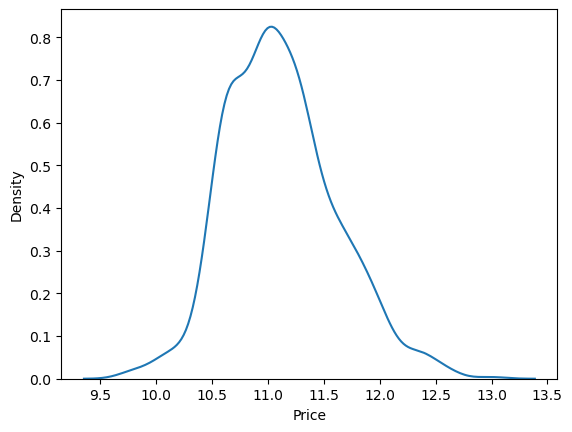

In [99]:
sns.kdeplot(x = np.log(df['Price']))

In [101]:
dfa = df.copy()

In [103]:
df.drop(columns = ['rating', 'warranty'], inplace = True)

In [227]:
dft = df[(df['processor'] != 'Intel Ryzen 7') & (df['processor_gnrtn'] != '4th')]

In [229]:
X = dft.drop('Price', axis = 'columns')
y = np.log(dft['Price'])

In [241]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = dft['processor_gnrtn'], test_size = 0.2, random_state = 3)

In [109]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [171]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf', OneHotEncoder(sparse_output = False, drop = 'first'), [0, 1, 6, 9, 15])
], remainder = 'passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe_lr = pipe

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.8329528737708459
0.14628297499218346


In [113]:
X.sample()

,brand,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,Touchscreen,msoffice,Number of Ratings,Number of Reviews,prcessor_gnrtn_na,processor
492,Lenovo,11th,8,2,512,0,Windows,64,4,Gaming,0,0,5,2,0,Intel Core i7


In [115]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [167]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf', OneHotEncoder(sparse_output = False, drop = 'first'), [0, 1, 6, 9, 15])
], remainder = 'passthrough')

step2 = Ridge()

pipe_temp = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

param_grid ={'step2__alpha' : [0.001, 0.01, 0.04, 0.02, 0.1, 0.05, 0.1,1,5 ,7 ,9 ,10, 11]}

pipe_cv = GridSearchCV(pipe_temp, param_grid = param_grid, n_jobs = -1, scoring = 'r2')

pipe_cv.fit(X_train, y_train)
pipe_ridge = pipe_cv.best_estimator_
pipe = pipe_cv.best_estimator_
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.8329013319052389
0.1462611293025766


E:\Anaconda\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


NameError: name 'best_params_ridge' is not defined

In [119]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf', OneHotEncoder(sparse_output = False, drop = 'first'), [0, 1, 6, 9, 15])
], remainder = 'passthrough')

step2 = KNeighborsRegressor()

pipe_temp = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

param_grid ={'step2__n_neighbors' : np.arange(1, 11)}

pipe_cv = GridSearchCV(pipe_temp, param_grid = param_grid, n_jobs = -1, scoring = 'r2')

pipe_cv.fit(X_train, y_train)
pipe = pipe_cv.best_estimator_
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.5677168130819725
0.2566769218863212


E:\Anaconda\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [135]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf', OneHotEncoder(sparse_output = False, drop = 'first'), [0, 1, 6, 9, 15])
], remainder = 'passthrough')

step2 = SVR()

pipe_temp = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

param_grid ={'step2__kernel' : ['rbf', 'poly', 'linear'], 'step2__degree' : [4, 5, 6],
             'step2__C' : [0.001, 0.01, 0.04, 0.02, 0.1, 30],
             'step2__gamma' : ['scale', 'auto']}

pipe_cv = GridSearchCV(pipe_temp, param_grid = param_grid, n_jobs = -1, scoring = 'r2', cv = 3)

pipe_cv.fit(X_train, y_train)
pipe = pipe_cv.best_estimator_
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

KeyboardInterrupt: 

In [173]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf', OneHotEncoder(sparse_output = False, drop = 'first'), [0, 1, 6, 9, 15])
], remainder = 'passthrough')

step2 = RandomForestRegressor(n_jobs = -1)

pipe_temp = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

param_grid ={'step2__criterion' : ['friedman_mse', 'squared_error'], 'step2__max_depth' : [5, 6, 7, 8, 9], 'step2__min_samples_split' : [2, 3],
             'step2__max_features' : [0.5, 0.6, 0.7, 0.8]}

pipe_cv = GridSearchCV(pipe_temp, param_grid = param_grid, n_jobs = -1, scoring = 'r2')

pipe_cv.fit(X_train, y_train)
pipe = pipe_cv.best_estimator_
pipe_rfr = pipe_cv.best_estimator_
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

E:\Anaconda\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan]
  warnings.warn(


0.7986594650204566
0.1642928951599562


In [133]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf', OneHotEncoder(sparse_output = False, drop = 'first'), [0, 1, 6, 9, 15])
], remainder = 'passthrough')

step2 = AdaBoostRegressor()

pipe_temp = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

param_grid ={'step2__estimator' : [None, RandomForestRegressor(n_jobs = -1), XGBRegressor(), DecisionTreeRegressor()]}

pipe_cv = GridSearchCV(pipe_temp, param_grid = param_grid, n_jobs = -1, scoring = 'r2')

pipe_cv.fit(X_train, y_train)
pipe = pipe_cv.best_estimator_
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

E:\Anaconda\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


0.7501052676660456
0.21215110685409982


In [141]:
import optuna

In [145]:
def objective(trial):
    # Suggest hyperparameters
    param = {
        'tree_method': 'gpu_hist',  # Use GPU for faster optimization if available
        'predictor': 'gpu_predictor', 
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'alpha': trial.suggest_float('alpha', 0, 10),
        'lambda': trial.suggest_float('lambda', 0, 10),
    }

    step1 = ColumnTransformer(transformers = [
        ('col_tnf', OneHotEncoder(sparse_output = False, drop = 'first'), [0, 1, 6, 9, 15])
    ], remainder = 'passthrough')
    
    step2 = XGBRegressor(**param)
    
    pipe = Pipeline([
        ('step1', step1),
        ('step2', step2)
    ])
    
    # Train the model
    pipe.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = pipe.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    return r2

In [155]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2024-07-30 17:33:31,582] A new study created in memory with name: no-name-ebf50ab5-a6ed-4b13-a0cb-b60fd5c1d6ca
E:\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:33:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
E:\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:33:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
E:\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:33:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd1

Number of finished trials: 100
Best trial: {'n_estimators': 886, 'max_depth': 10, 'learning_rate': 0.26129951146982056, 'subsample': 0.6098477424333362, 'colsample_bytree': 0.934151193548452, 'alpha': 0.3039787172531381, 'lambda': 4.893472153729983}


In [159]:
# Get the best hyperparameters
best_params_xgb = study.best_trial.params

step1 = ColumnTransformer(transformers = [
        ('col_tnf', OneHotEncoder(sparse_output = False, drop = 'first'), [0, 1, 6, 9, 15])
    ], remainder = 'passthrough')
    
step2 = XGBRegressor(**best_params)
    
final_pipe = Pipeline([
        ('step1', step1),
        ('step2', step2)
    ])
final_pipe.fit(X_train, y_train)

# Predict and evaluate
y_pred = final_pipe.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'Final r2: {r2}')

Final r2: 0.8646632986915619


In [175]:
from sklearn.ensemble import VotingRegressor

In [245]:
best_params_xgb

step2 = XGBRegressor(**best_params_xgb)
xgb_pipe = Pipeline([
        ('step1', step1),
        ('step2', step2)
    ])

estimators = [
    ('xgb', xgb_pipe),
    ('rfr', pipe_rfr),
    ('lr', pipe_lr),
    ('ridge', pipe_ridge)
]

vc = VotingRegressor(estimators = estimators)
vc.fit(X_train, y_train)

VotingRegressor(estimators=[('xgb',
                             Pipeline(steps=[('step1',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('col_tnf',
                                                                               OneHotEncoder(drop='first',
                                                                                             sparse_output=False),
                                                                               [0,
                                                                                1,
                                                                                6,
                                                                                9,
                                                                                15])])),
                                             ('step2',
                                              XGBRegressor(alpha=0.3039787172531381,
                                                           base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=0.934...
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('col_tnf',
                                                                               OneHotEncoder(drop='first',
                                                                                             sparse_output=False),
                                                                               [0,
                                                                                1,
                                                                                6,
                                                                                9,
                                                                                15])])),
                                             ('step2', LinearRegression())])),
                            ('ridge',
                             Pipeline(steps=[('step1',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('col_tnf',
                                                                               OneHotEncoder(drop='first',
                                                                                             sparse_output=False),
                                                                               [0,
                                                                                1,
                                                                                6,
                                                                                9,
                                                                                15])])),
                                             ('step2', Ridge(alpha=0.001))]))])

In [251]:
r2_score(y_test, vc.predict(X_test))

0.8696284445160767

In [329]:
from sklearn.ensemble import BaggingRegressor
step2a = XGBRegressor(**best_params_xgb)

xgb_pipe = Pipeline([
        ('step1', step1),
        ('step2a', step2a)
    ])
bagging_regressor = BaggingRegressor(estimator = xgb_pipe)

step2b = bagging_regressor
bagging_pipe = Pipeline([
        ('step1', step1),
        ('step2b', step2b)
    ])
bagging_pipe.fit(X_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 1, 6, 9, 15])])),
                ('step2b',
                 BaggingRegressor(estimator=Pipeline(steps=[('step1',
                                                             ColumnTransformer(remainder='passthrough',
                                                                               transformers=[('col_tnf',
                                                                                              OneHotEncoder(drop='first',
                                                                                                            handle_unknow...
                                                                          grow_policy=None,
                                                                          importance_type=None,
                                                                          interaction_constraints=None,
                                                                          lambda=4.893472153729983,
                                                                          learning_rate=0.26129951146982056,
                                                                          max_bin=None,
                                                                          max_cat_threshold=None,
                                                                          max_cat_to_onehot=None,
                                                                          max_delta_step=None,
                                                                          max_depth=10,
                                                                          max_leaves=None,
                                                                          min_child_weight=None,
                                                                          missing=nan,
                                                                          monotone_constraints=None,
                                                                          multi_strategy=None,
                                                                          n_estimators=886,
                                                                          n_jobs=None, ...))])))])

In [331]:
r2_score(y_test, bagging_pipe.predict(X_test))

0.880147526758646

In [307]:
import pickle as pkl
pkl.dump(dft, open('df.pkl', 'wb'))
pkl.dump(bagging_pipe, open('best_model.pkl', 'wb'))

In [303]:
ada = AdaBoostRegressor(estimator = bagging_pipe)
step2 = ada
ada_pipe = Pipeline([
        ('step1', step1),
        ('step2d', step2)
    ])

ada_pipe.fit(X_train, y_train)
#r2_score(y_test, bagging_pipe.predict(X_test))

E:\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [3] during transform. These unkno

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 1, 6, 9, 15])])),
                ('step2d',
                 AdaBoostRegressor(estimator=Pipeline(steps=[('step1',
                                                              ColumnTransformer(remainder='passthrough',
                                                                                transformers=[('col_tnf',
                                                                                               OneHotEncoder(drop='first',
                                                                                                             handle_unkno...
                                                                                                                       grow_policy=None,
                                                                                                                       importance_type=None,
                                                                                                                       interaction_constraints=None,
                                                                                                                       lambda=4.893472153729983,
                                                                                                                       learning_rate=0.26129951146982056,
                                                                                                                       max_bin=None,
                                                                                                                       max_cat_threshold=None,
                                                                                                                       max_cat_to_onehot=None,
                                                                                                                       max_delta_step=None,
                                                                                                                       max_depth=10,
                                                                                                                       max_leaves=None,
                                                                                                                       min_child_weight=None,
                                                                                                                       missing=nan,
                                                                                                                       monotone_constraints=None,
                                                                                                                       multi_strategy=None,
                                                                                                                       n_estimators=886,
                                                                                                                       n_jobs=None, ...))])))])))])

In [305]:
r2_score(y_test, ada_pipe.predict(X_test))

E:\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [3] during transform. These unkno

0.873036966080542

In [333]:
dft.drop(columns= ['Price'], axis = 'columns')

,brand,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,Touchscreen,msoffice,Number of Ratings,Number of Reviews,prcessor_gnrtn_na,processor
0,ASUS,10th,4,2,0,1024,Windows,64,0,Casual,0,0,3,0,0,Intel Core i3
1,Lenovo,10th,4,2,0,1024,Windows,64,0,Casual,0,0,65,5,0,Intel Core i3
2,Lenovo,10th,4,2,0,1024,Windows,64,0,Casual,0,0,8,1,0,Intel Core i3
3,ASUS,10th,8,2,512,0,Windows,32,2,Casual,0,0,0,0,0,Intel Core i5
4,ASUS,Not Available,4,2,0,512,Windows,64,0,Casual,0,0,0,0,-1,Intel Celeron Dual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,Not Available,4,2,1024,0,Windows,64,0,Casual,0,0,0,0,-1,AMD Ryzen 9
819,ASUS,Not Available,4,2,1024,0,Windows,64,0,Casual,0,0,0,0,-1,AMD Ryzen 9
820,ASUS,Not Available,4,2,1024,0,Windows,64,4,Casual,0,0,0,0,-1,AMD Ryzen 9
821,ASUS,Not Available,4,2,1024,0,Windows,64,4,Casual,0,0,0,0,-1,AMD Ryzen 9


In [337]:
dft['processor_gnrtn'].unique()

array(['10th', 'Not Available', '11th', '7th', '8th', '9th', '12th'],
      dtype=object)

In [339]:
dft['processor'].unique()

array(['Intel Core i3', 'Intel Core i5', 'Intel Celeron Dual',
       'AMD Ryzen 5', 'Intel Core i7', 'Intel Core i9', 'M1',
       'Intel Pentium Quad', 'AMD Ryzen 3', 'AMD Ryzen 7', 'AMD Ryzen 9'],
      dtype=object)

In [341]:
dft[dft['processor'] == 'M1']['processor_gnrtn'].value_counts()

processor_gnrtn
10th    19
Name: count, dtype: int64

In [343]:
dft['brand'].unique()

array(['ASUS', 'Lenovo', 'acer', 'Avita', 'HP', 'DELL', 'MSI', 'APPLE'],
      dtype=object)

In [353]:
dft[dft['brand'] == 'APPLE']['weight'].value_counts()

weight
Casual    23
Name: count, dtype: int64

In [355]:
dft[dft['brand'] == 'APPLE']['os'].value_counts()

os
Mac    23
Name: count, dtype: int64

In [359]:
dft[dft['brand'] == 'APPLE']['os_bit'].value_counts()

os_bit
64    23
Name: count, dtype: int64

In [361]:
dft[dft['brand'] == 'APPLE']['graphic_card_gb'].value_counts()

graphic_card_gb
0    23
Name: count, dtype: int64

In [363]:
dft[dft['brand'] == 'APPLE']['ram_type'].value_counts()

ram_type
2    19
4     3
0     1
Name: count, dtype: int64

In [365]:
dft[dft['brand'] == 'APPLE']['ram_gb'].value_counts()

ram_gb
16    11
8     10
4      1
32     1
Name: count, dtype: int64

In [367]:
df.groupby('ram_type')['ram_gb'].unique()

ram_type
0           [8, 16]
1           [8, 16]
2    [4, 8, 16, 32]
3        [4, 8, 16]
4        [8, 4, 16]
5        [8, 16, 4]
Name: ram_gb, dtype: object

In [397]:
ram_gb = {}
for index, value in dft.groupby(dft[dft['brand'] == 'APPLE']['ram_type']):
    ram_gb[int(index)] = value['ram_gb'].unique()

In [389]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 0 to 822
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              800 non-null    object
 1   processor_gnrtn    800 non-null    object
 2   ram_gb             800 non-null    int32 
 3   ram_type           800 non-null    int32 
 4   ssd                800 non-null    int32 
 5   hdd                800 non-null    int32 
 6   os                 800 non-null    object
 7   os_bit             800 non-null    int32 
 8   graphic_card_gb    800 non-null    int32 
 9   weight             800 non-null    object
 10  Touchscreen        800 non-null    int32 
 11  msoffice           800 non-null    int32 
 12  Price              800 non-null    int64 
 13  Number of Ratings  800 non-null    int32 
 14  Number of Reviews  800 non-null    int32 
 15  prcessor_gnrtn_na  800 non-null    int32 
 16  processor          800 non-null    object
dtypes:

In [399]:
ram_gb

{0: array([8]), 2: array([ 8, 16,  4, 32]), 4: array([ 8, 16])}

In [423]:
ssd = {}
df_temp = dft[dft['brand'] == 'APPLE']
for index, value in df_temp.groupby(['ram_type', 'ssd']):
    ssd[index[0]] = [index[1]]
    #ram_gb[int(index)] = value['ram_gb'].unique()

In [425]:
ssd

{0: [512], 2: [1024], 4: [1024]}

In [421]:
df_temp['hdd'].value_counts()

hdd
0    23
Name: count, dtype: int64

In [429]:
df_temp['Touchscreen'].value_counts()

Touchscreen
0    23
Name: count, dtype: int64

In [431]:
df['Number of Ratings'].max()

15279

In [433]:
df['Number of Reviews'].max()

1947

In [443]:
import sklearn
sklearn.__version__

'1.4.2'

In [439]:
np.__version__

'1.26.4'

In [441]:
pd.__version__

'2.2.2'